<a href="https://colab.research.google.com/github/Shalini-13/733-assignment/blob/main/classwork4%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Generate a 2D dataset
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)


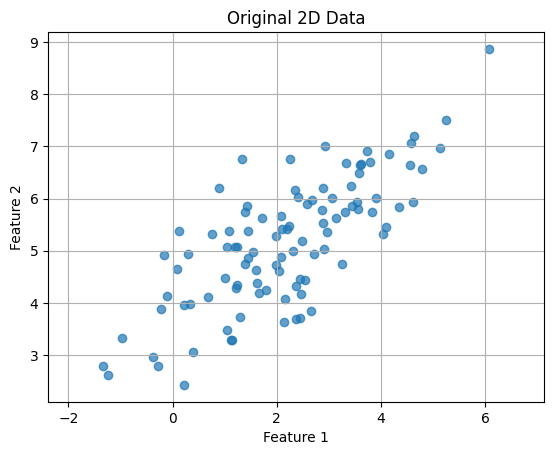

In [3]:
# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


In [4]:
#2: Centering the Data
x_centered = X - np.mean(X, axis=0)

In [5]:
#3: computing the covariance matrix
cov_matrix = np.cov(x_centered.T)

In [6]:
#4: calculating the eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [7]:
#5: Data projection onto the first principal vector
first_pc = eig_vecs[:, 0]
x_pca_1d = x_centered.dot(first_pc)

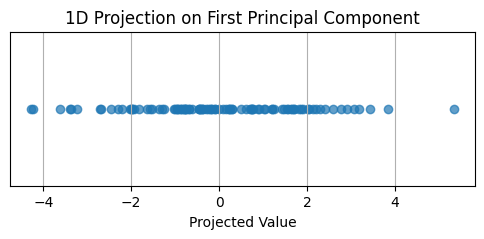

In [8]:
#6: plotting the 1d projection and comparing with the 2d projection
plt.figure(figsize=(6, 2))
plt.scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7)
plt.title("1D Projection on First Principal Component")
plt.xlabel("Projected Value")
plt.yticks([])
plt.grid(True)
plt.show()


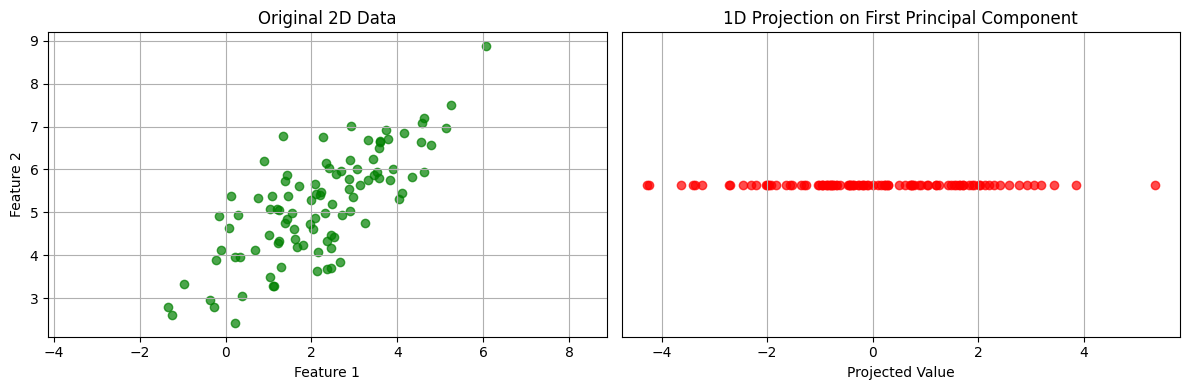

In [10]:
#6: plotting the 1d projection and comparing with the 2d projection
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='green')
axs[0].set_title("Original 2D Data")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].axis("equal")
axs[0].grid(True)

axs[1].scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7, color='red')
axs[1].set_title("1D Projection on First Principal Component")
axs[1].set_xlabel("Projected Value")
axs[1].set_yticks([])
axs[1].grid(True)

plt.tight_layout()
plt.show()

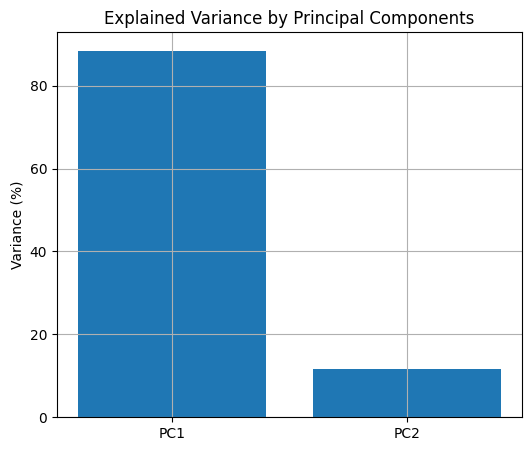

In [14]:
#7: plotting the amount of variance explained by each component
explained_variance = eig_vals / np.sum(eig_vals)
plt.figure(figsize=(6, 5))
plt.bar(["PC1", "PC2"], explained_variance * 100)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance (%)")
plt.grid(True)
plt.show()

In [16]:
# Use t-SNE to visualize how it seperates points from different classes in 2d spaces.
#1. inspecting the shape of x and y, what do the 64 features present?
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
# Load dataset
digits = load_digits()
X = digits.data  # (1797, 64)
y = digits.target  # Labels: 0–9

print("Shape of x,y:", X.shape)

# In the digits dataset 64 features represent the pixel width and length which is 8x8. After the x data gets flattened each image becomes a vector of 64 values.

Shape of x,y: (1797, 64)


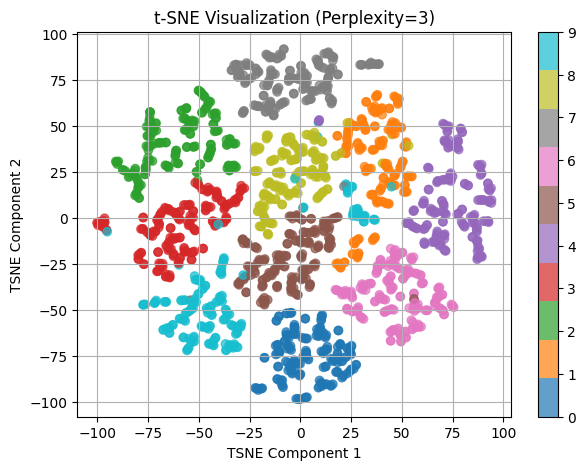

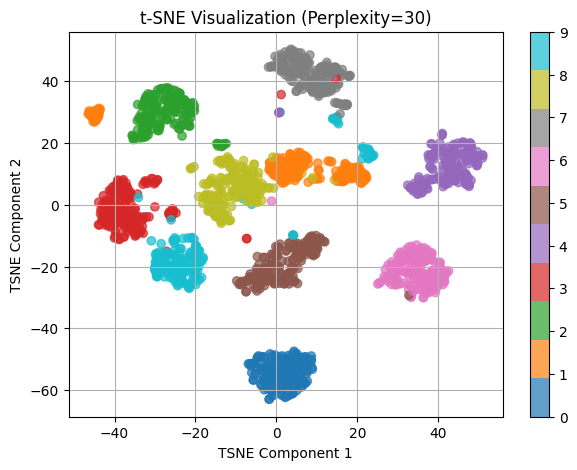

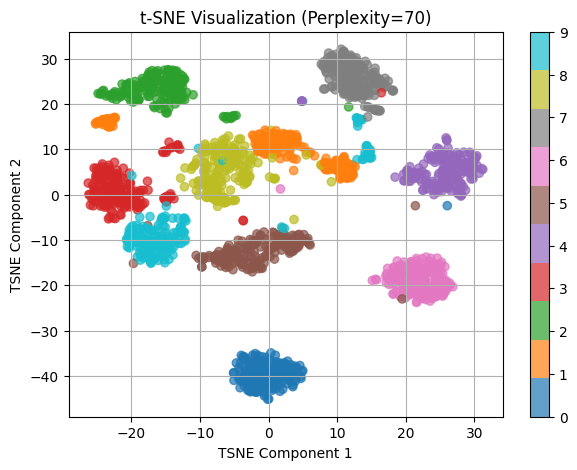

In [18]:
# 2,3,4: used different perplexity values and visualized the 2d t-SNE embedding and Had the t-SNE components,n_components=2

perplexities = [3, 30, 70]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"t-SNE Visualization (Perplexity={perp})")
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.grid(True)
    plt.show()